In [1]:
!pip install wordcloud
!pip install emoji
!pip install nltk
import pandas as pd
import emoji 
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [2]:
base_color = sns.color_palette()[0]

In [3]:
import pandas as pd
import re

# Specify the file path
file_path =  r'C:\Users\Admin\Downloads\_chat.txt'

# Define a regular expression pattern to extract timestamp, sender, and message
pattern = re.compile(r'\[(\d{2}/\d{2}/\d{4}, \d{2}:\d{2}:\d{2})\] ([^:]+): (.+)')

# Initialize lists to store extracted information
timestamps = []
senders = []
messages = []

# Read the file line by line and extract information
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        matches = pattern.findall(line)
        if matches:
            timestamp, sender, message = matches[0]
            timestamps.append(pd.to_datetime(timestamp, format='%d/%m/%Y, %H:%M:%S'))
            senders.append(sender)
            messages.append(message)

# Create a DataFrame from the extracted information
df = pd.DataFrame({'timestamp': timestamps, 'sender': senders, 'message': messages})

# Print the resulting DataFrame
print(df)


               timestamp              sender  \
0    2020-11-18 21:47:16  RMS DIGITAL REVAMP   
1    2020-11-18 21:47:16       Carol Wanyama   
2    2022-10-19 14:00:38  RMS DIGITAL REVAMP   
3    2022-10-19 14:04:16       Carol Wanyama   
4    2022-10-19 14:04:26       Carol Wanyama   
...                  ...                 ...   
6033 2024-02-09 07:45:55         Ephy Mwangi   
6034 2024-02-09 10:24:24     James Bundi Rms   
6035 2024-02-09 10:24:38     James Bundi Rms   
6036 2024-02-09 10:24:53     James Bundi Rms   
6037 2024-02-09 12:50:54          Afune Fred   

                                                message  
0     ‎Messages and calls are end-to-end encrypted. ...  
1                     ‎Carol Wanyama created this group  
2                              ‎Carol Wanyama added you  
3                                        ‎image omitted  
4                              Birthday Cake Loading🥳🥳🥳  
...                                                 ...  
6033             

In [5]:
df.shape

(6038, 3)

In [6]:
df['timestamp'].head()

0   2020-11-18 21:47:16
1   2020-11-18 21:47:16
2   2022-10-19 14:00:38
3   2022-10-19 14:04:16
4   2022-10-19 14:04:26
Name: timestamp, dtype: datetime64[ns]

In [ ]:
## UNIVARIATE ANALYSIS

In [7]:
# Check the data type of the 'sender' column
print(df['sender'].dtype)



object


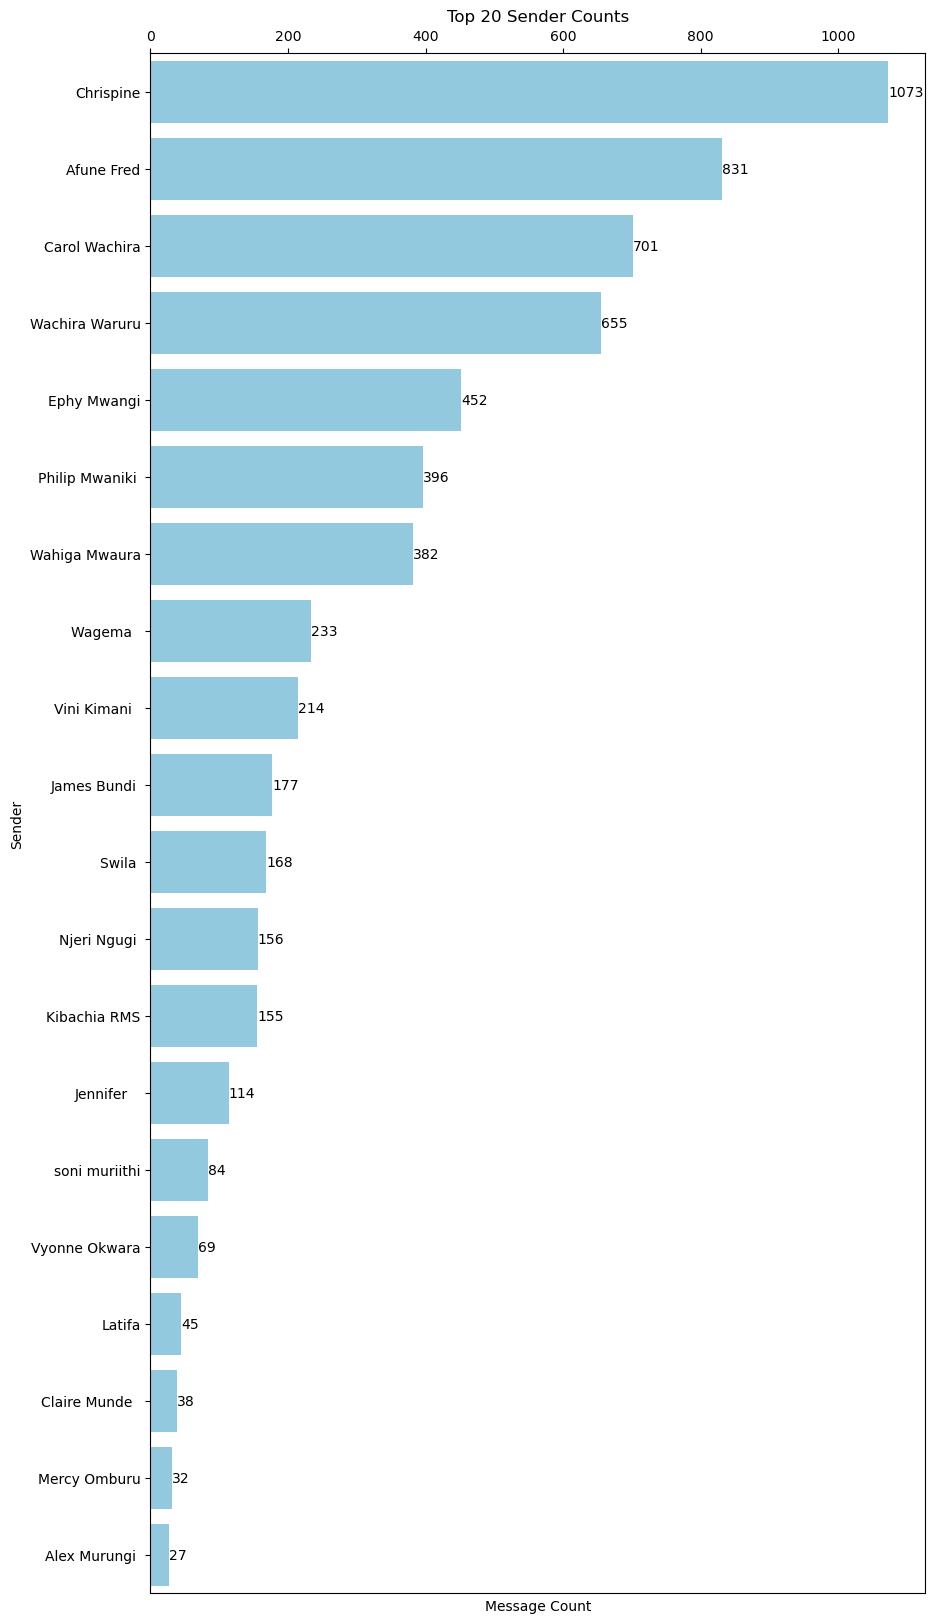

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Remove certain words from the 'sender' column
df['sender'] = df['sender'].str.replace('Rms', '',regex= False)
df['sender'] = df['sender'].str.replace('Wanyama','Wachira',regex= False)
df['sender'] = df['sender'].str.replace('Crispin Royal Media','Chrispine',regex= False)
df['sender'] = df['sender'].str.replace('Sales','',regex= False)
df['sender'] = df['sender'].str.replace('Digital','',regex= False)

# Counting and plotting the first top 20 senders
sender_order = df['sender'].value_counts().index[:20]


plt.figure(figsize=(10, 20))
sns.countplot(data=df, y="sender", order=sender_order, color='skyblue')

# Add data labels to the bars
for index, value in enumerate(df['sender'].value_counts()[sender_order]):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

plt.xticks(rotation=90)
plt.gca().xaxis.set_ticks_position('top')
plt.title('Top 20 Sender Counts')
plt.xlabel('Message Count')
plt.ylabel('Sender')
plt.show()


The above represents The Top 20 users that sent the most messages

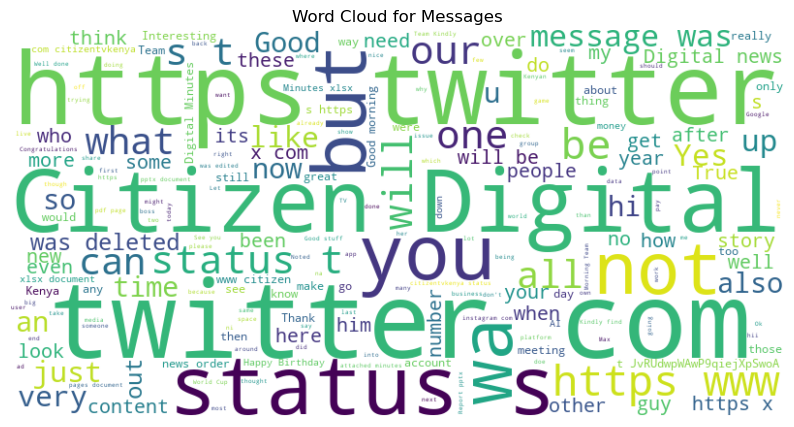

In [9]:
from wordcloud import WordCloud, STOPWORDS

# Define the words you want to exclude
exclude_words = set(['omitted', 'sticker','video','image','This message was deleted','this','is','that','I','am','are','they','and','to','the','for','in','it','of','a','on','there','as','from','them','he','she','has','had','we','have','with','or','at','if','by','their'])  # Add the words you want to exclude

# Join the messages while excluding specified words
filtered_text = ' '.join([word for word in df['message'] if word.lower() not in exclude_words])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', stopwords=exclude_words).generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Messages')
plt.show()


The above shows the most used words in the chat

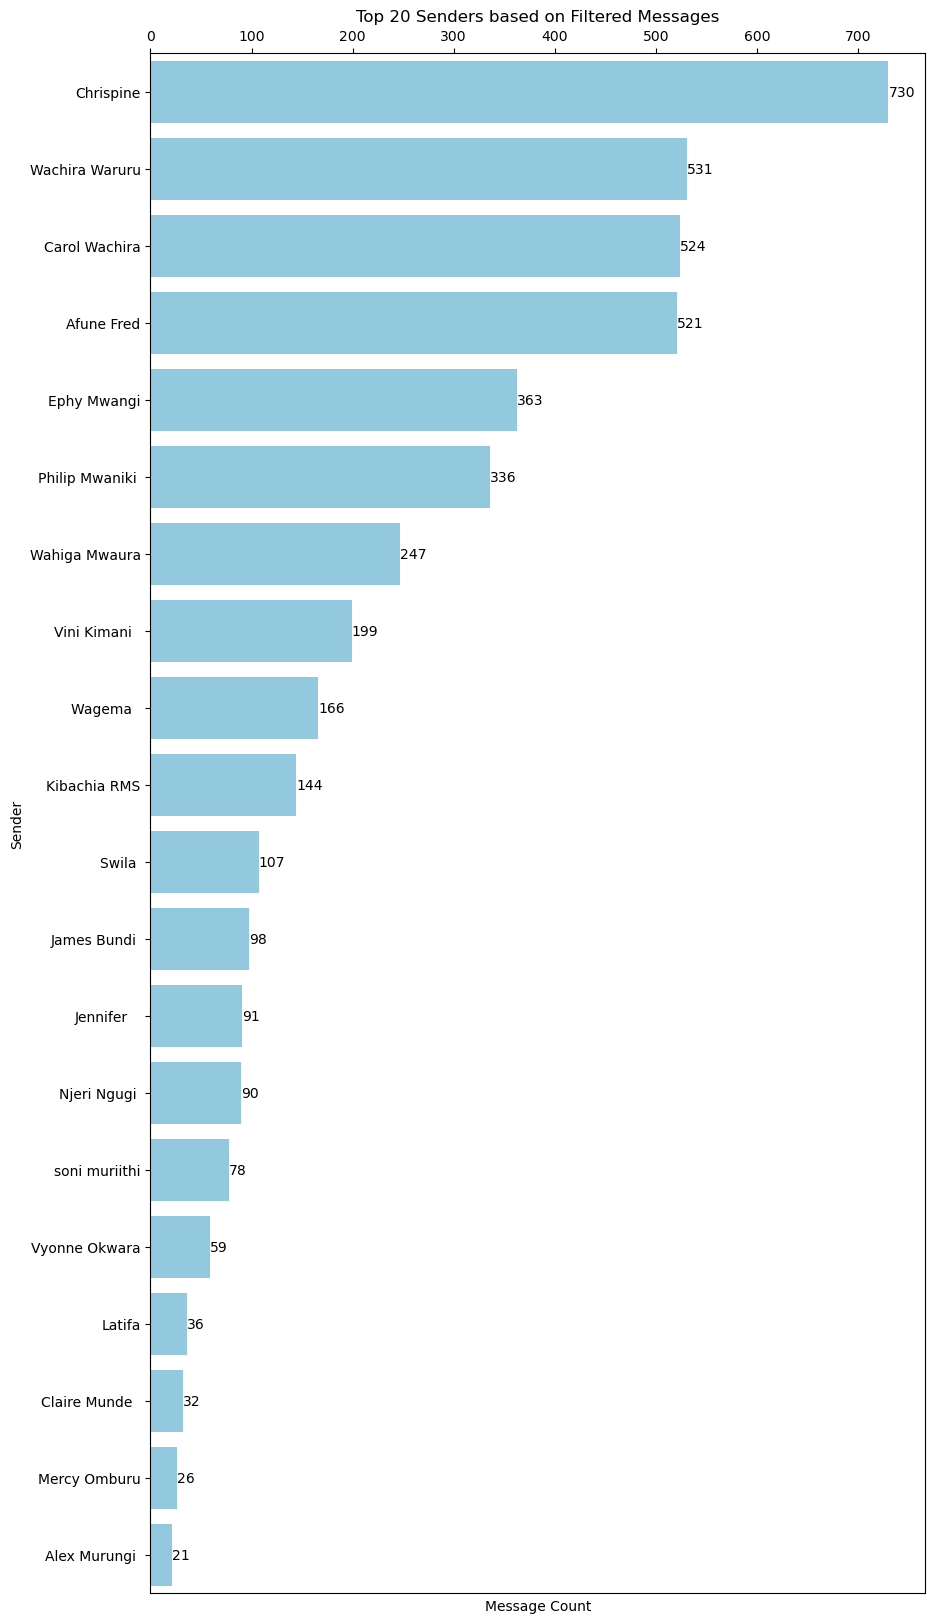

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Define the words you want to exclude
exclude_words = set(['video omitted', 'sticker omitted', 'image omitted', 'This message was deleted'])  # Add the words you want to exclude

# Create a mask for messages containing excluded words
exclude_mask = df['message'].str.contains('|'.join(map(re.escape, exclude_words)), case=False)

# Exclude rows containing excluded words from the DataFrame using .loc
df_filtered = df.loc[~exclude_mask].copy()  # Use .copy() to create a copy of the DataFrame

# Get the top 20 senders based on the filtered DataFrame
top_20_senders = df_filtered['sender'].value_counts().index[:20]

df_filtered['sender'] = df_filtered['sender'].str.replace('Rms', '', regex=False)
df_filtered['sender'] = df_filtered['sender'].str.replace('Wanyama', 'Wachira', regex=False)
df_filtered['sender'] = df_filtered['sender'].str.replace('Crispin Royal Media', 'Chrispine', regex=False)
df_filtered['sender'] = df_filtered['sender'].str.replace('Sales', '', regex=False)
df_filtered['sender'] = df_filtered['sender'].str.replace('Digital', '', regex=False)

# Plot the count of messages by the top 20 senders with data labels
plt.figure(figsize=(10, 20))
sns.countplot(data=df_filtered, y="sender", order=top_20_senders, color='skyblue')

# Add data labels to the bars
for index, value in enumerate(df_filtered['sender'].value_counts()[top_20_senders]):
    plt.text(value, index, str(value), ha='left', va='center', color='black')
    
plt.xticks(rotation=90)
plt.gca().xaxis.set_ticks_position('top')
plt.title('Top 20 Senders based on Filtered Messages')
plt.xlabel('Message Count')
plt.ylabel('Sender')
plt.show();


In [12]:
df_filtered.shape

(4428, 3)

In [21]:
#df['Year_Month'] = df['timestamp'].dt.to_period("M")
df['Year'] = df['timestamp'].dt.to_period("Y")
df['Month'] = df['timestamp'].dt.month_name()


df.head()


,timestamp,sender,message,Year_Month,Year,Month
0,2020-11-18 21:47:16,RMS DIGITAL REVAMP,‎Messages and calls are end-to-end encrypted. ...,2020-11,2020,November
1,2020-11-18 21:47:16,Carol Wachira,‎Carol Wanyama created this group,2020-11,2020,November
2,2022-10-19 14:00:38,RMS DIGITAL REVAMP,‎Carol Wanyama added you,2022-10,2022,October
3,2022-10-19 14:04:16,Carol Wachira,‎image omitted,2022-10,2022,October
4,2022-10-19 14:04:26,Carol Wachira,Birthday Cake Loading🥳🥳🥳,2022-10,2022,October


In [20]:
df['Year'].value_counts()

2023    4046
2022    1565
2024     425
2020       2
Freq: A-DEC, Name: Year, dtype: int64

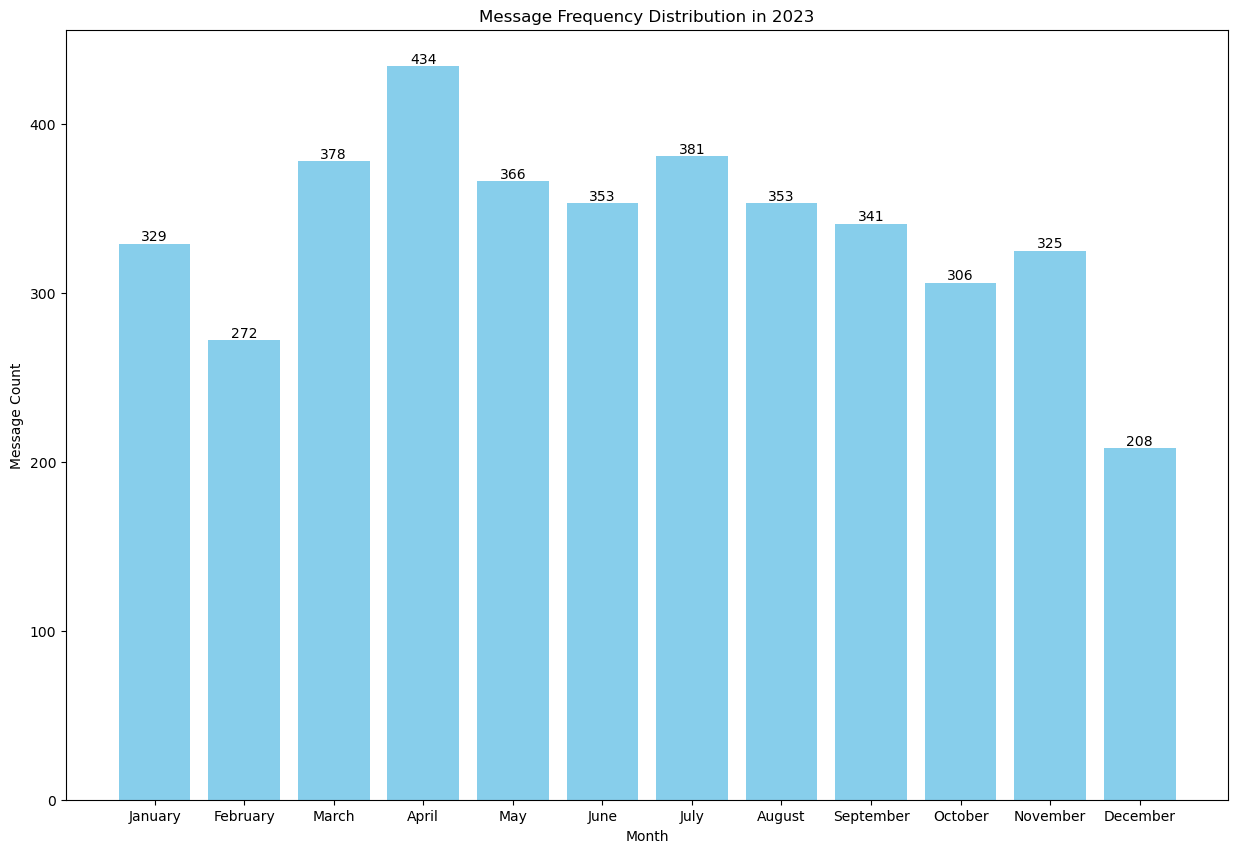

In [38]:

import calendar



# Filter data for the year 2023
df_2023 = df[df['timestamp'].dt.year == 2023].copy()

# Calculate the frequency distribution of messages
message_count_by_month = df_2023['timestamp'].dt.month.value_counts().sort_index()

# Get month names
month_names = [calendar.month_name[i] for i in message_count_by_month.index]

# Plot the distribution with data labels
plt.figure(figsize=(15, 10))
bars = plt.bar(month_names, message_count_by_month, color='skyblue')

# Display data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1),ha='center', va='bottom')

plt.title('Message Frequency Distribution in 2023')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.show()


We can conclude from the above that the most active month in terms of frequency of messages is December 2022

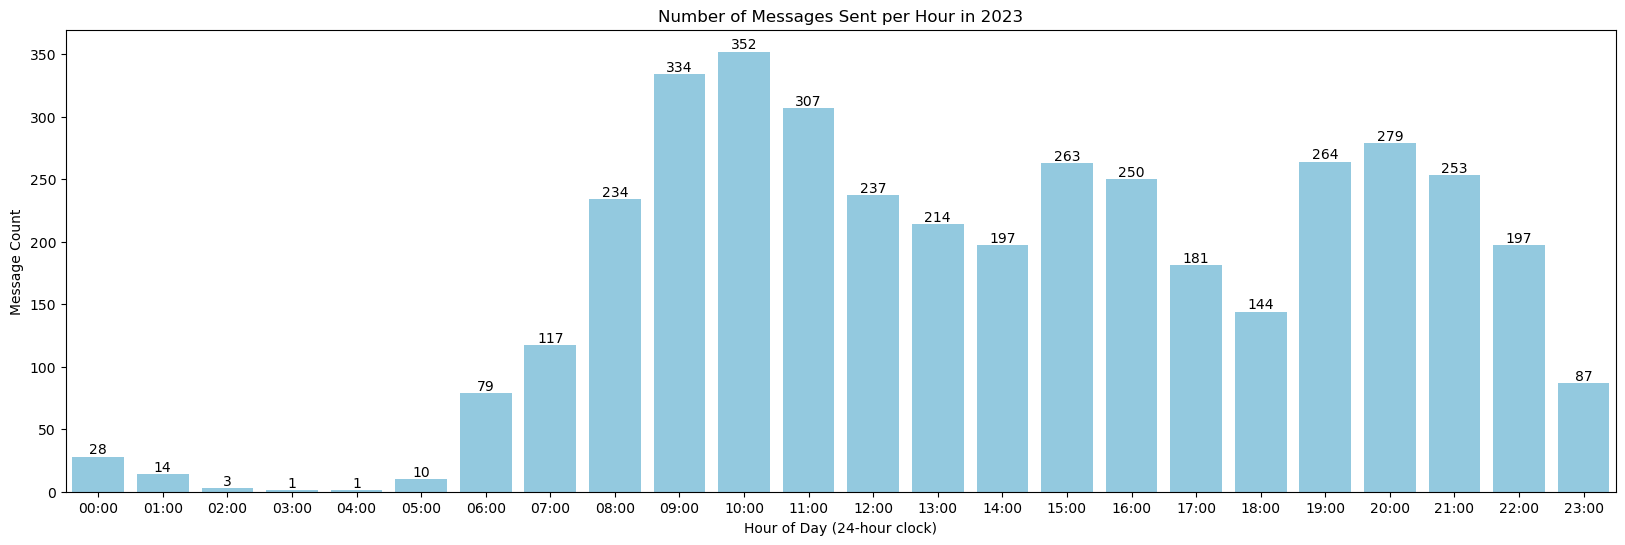

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from the timestamp
df_2023['hour'] = df_2023['timestamp'].dt.hour

# Calculate the frequency distribution of messages per hour
hourly_message_count = df_2023['hour'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(20, 6))
bars = sns.barplot(x=hourly_message_count.index, y=hourly_message_count.values, color='skyblue')
# Add data labels to the bars
for bar, value in zip(bars.patches, hourly_message_count.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),ha='center', va='bottom')

plt.title('Number of Messages Sent per Hour in 2023')
plt.xlabel('Hour of Day (24-hour clock)')
plt.ylabel('Message Count')
plt.xticks(rotation=0)

# Adjust x-axis ticks to display in 24-hour format
plt.xticks(range(24), [f'{hour:02}:00' for hour in range(24)])

plt.show()


Most people are active at 10.00 am


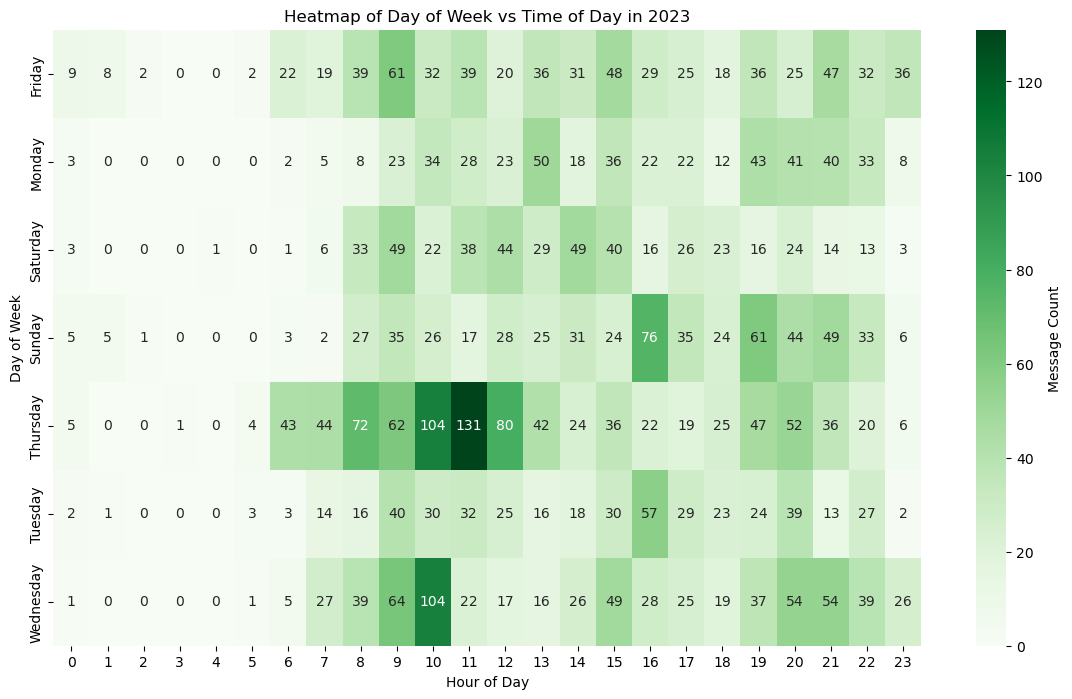

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create new columns for day of week and hour of day
df_2023['day_of_week'] = df_2023['timestamp'].dt.day_name()
df_2023['hour_of_day'] = df_2023['timestamp'].dt.hour

# Create a pivot table for the heatmap with 'hour_of_day' on the horizontal axis
heatmap_data = df_2023.pivot_table(index='day_of_week', columns='hour_of_day', values='message', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Greens', annot=True, fmt='g', cbar_kws={'label': 'Message Count'})
plt.title('Heatmap of Day of Week vs Time of Day in 2023')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


Most people text on thursdays at 11.00 am